In [1]:
import EITfunc.EITlook as eit

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as clrs
import matplotlib.cm as cmx
import matplotlib.colorbar as cb
import matplotlib.patches as patches
from matplotlib.collections import PatchCollection
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib import gridspec

import matplotlib.style
import matplotlib as mpl
mpl.style.use('classic')

import os
import itertools

from astropy import units as u
from astropy.constants import G
from astropy.io import ascii, fits
from astropy.table import Table
from astropy.timeseries import LombScargle
import astropy.time

import scipy.optimize as sciop
from scipy.stats import mode, binned_statistic

import time

%matplotlib inline

In [2]:
#columns:
#t_obs[JD] flux[W m^-2] flux_unc[W m^-2]
#days without observations have flux=nan, fluxerr=nan
virgo = np.genfromtxt("../data/VIRGO/virgoDailyData.txt")
#print(virgo)
print(np.shape(virgo))

(10129, 3)


In [3]:
noObs = np.isnan(virgo[:,1])
n_noObs = len(virgo[:,0][noObs])
print(n_noObs)
dutyCycle = n_noObs/len(virgo)
print(dutyCycle)

210
0.02073255010366275


In [4]:
medianFlux = np.median(virgo[:,1][~noObs])
virgo[:,1] = virgo[:,1]/medianFlux
virgo[:,2] = virgo[:,2]/medianFlux

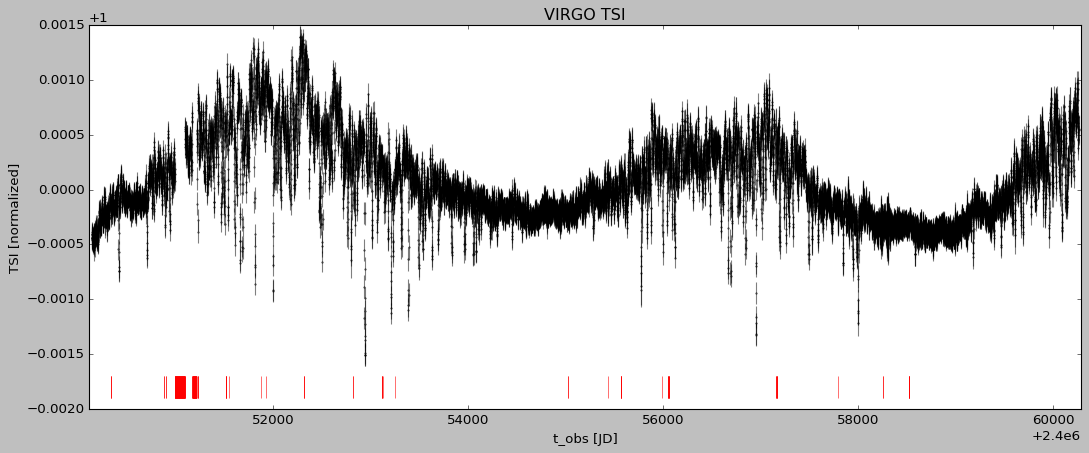

In [5]:
fig, ax = plt.subplots(1,1,figsize=(16,6))
ax.errorbar(virgo[:,0],virgo[:,1],yerr=virgo[:,2],marker='.',ms=3,color='k',ls='None',capsize=0,elinewidth=1,alpha=0.5)
ax.plot(virgo[:,0][noObs],0.9982*np.ones_like(virgo[:,0][noObs]),marker='|',color='r',ls='None',ms=20)

ax.set_xlabel("t_obs [JD]")
ax.set_ylabel("TSI [normalized]")
ax.set_xlim(virgo[0,0]-25,virgo[-1,0]+25)
ax.set_title("VIRGO TSI")
#plt.show()
plt.savefig("./VIRGO_LC_norm.pdf")

In [6]:
np.savetxt("./VIRGO_LC_norm.txt",virgo,fmt="%.10f",header="t_obs[JD] flux[norm] flux_unc[norm]")